# Predicting Gamer Behavior

Dataset: https://www.kaggle.com/datasets/rabieelkharoua/predict-online-gaming-behavior-dataset

## Data Preprocessing

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [68]:
gamer = pd.read_csv("online_gaming_behavior_dataset.csv")
df = gamer.copy()

In [69]:
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

In [71]:
# There are no missing values.

In [72]:
df.shape

(40034, 13)

In [73]:
df.nunique()

PlayerID                     40034
Age                             35
Gender                           2
Location                         4
GameGenre                        5
PlayTimeHours                40034
InGamePurchases                  2
GameDifficulty                   3
SessionsPerWeek                 20
AvgSessionDurationMinutes      170
PlayerLevel                     99
AchievementsUnlocked            50
EngagementLevel                  3
dtype: int64

In [74]:
df.select_dtypes(include=["object"]).nunique()

Gender             2
Location           4
GameGenre          5
GameDifficulty     3
EngagementLevel    3
dtype: int64

In [75]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PlayerID,40034.0,29016.500000,11556.964675,9000.000000,19008.250000,29016.500000,39024.750000,49033.000000
Age,40034.0,31.992531,10.043227,15.000000,23.000000,32.000000,41.000000,49.000000
PlayTimeHours,40034.0,12.024365,6.914638,0.000115,6.067501,12.008002,17.963831,23.999592
InGamePurchases,40034.0,0.200854,0.400644,0.000000,0.000000,0.000000,0.000000,1.000000
SessionsPerWeek,40034.0,9.471774,5.763667,0.000000,4.000000,9.000000,14.000000,19.000000
AvgSessionDurationMinutes,40034.0,94.792252,49.011375,10.000000,52.000000,95.000000,137.000000,179.000000
PlayerLevel,40034.0,49.655568,28.588379,1.000000,25.000000,49.000000,74.000000,99.000000
AchievementsUnlocked,40034.0,24.526477,14.430726,0.000000,12.000000,25.000000,37.000000,49.000000


In [76]:
# We won't need "PlayerID" column

df = df.drop(columns=["PlayerID"])

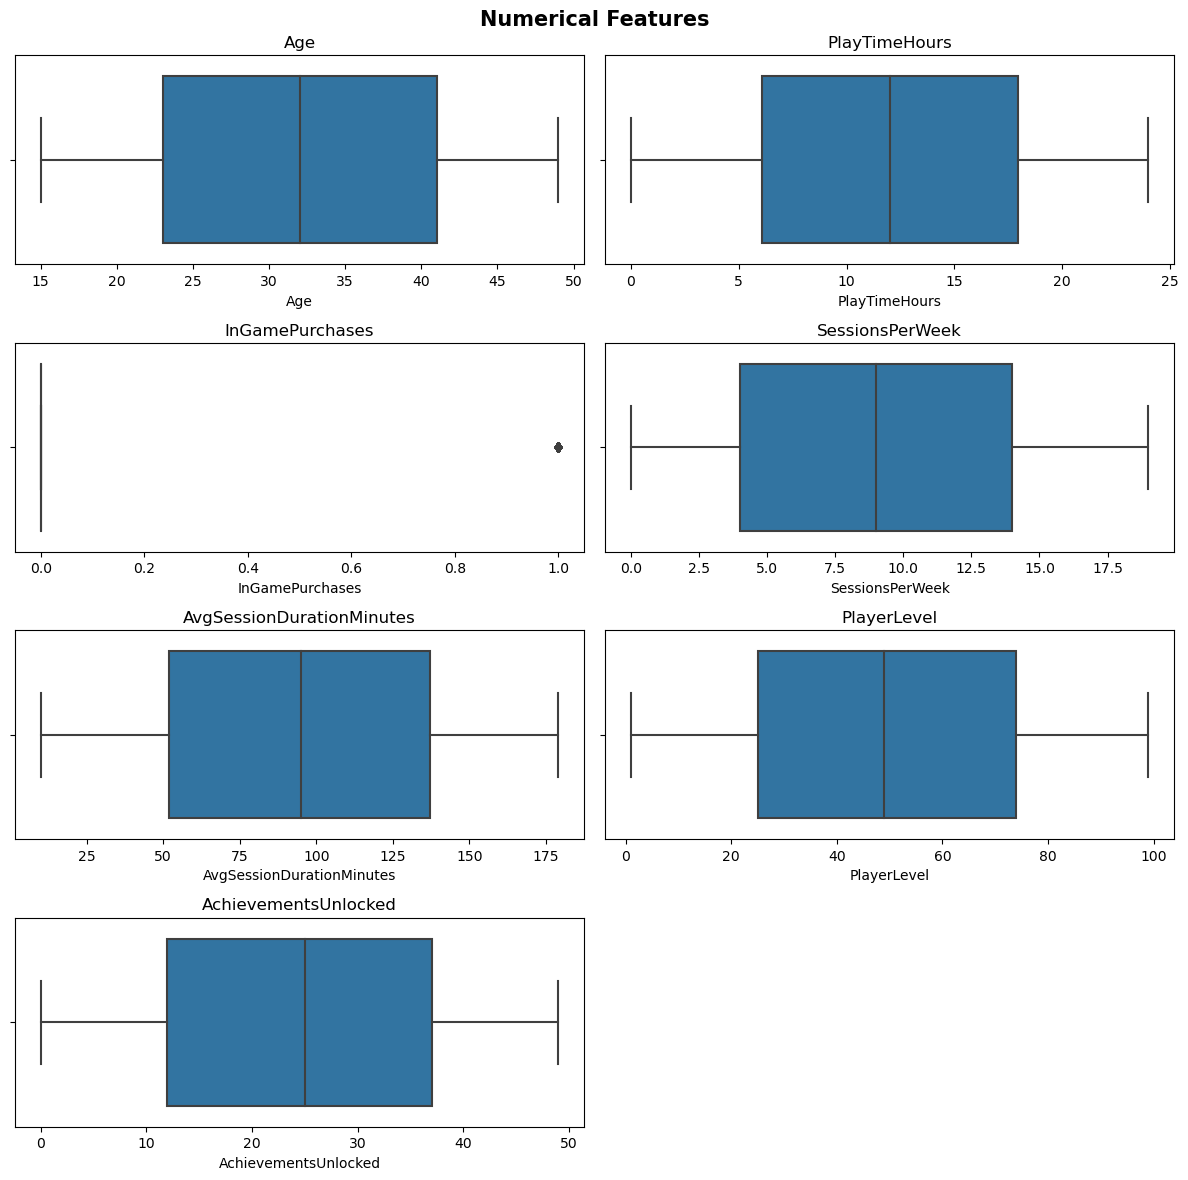

In [77]:
fig, axes = plt.subplots(4, 2, figsize=(12, 12))

for i, column in enumerate(df.select_dtypes(include=["int64", "float64"])):
    sns.boxplot(x=df[column], ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(column)
    
for i in range(len(df.select_dtypes(include=["int64", "float64"]).columns), 4 * 2):
    fig.delaxes(axes[i // 2, i % 2])
    
plt.suptitle("Numerical Features", fontsize=15, fontweight="bold")
plt.tight_layout()
plt.show()

In [78]:
for i, column in enumerate(df.select_dtypes(include=["object"])):
    print(df[column].value_counts())
    print("\n")

Gender
Male      23959
Female    16075
Name: count, dtype: int64


Location
USA       16000
Europe    12004
Asia       8095
Other      3935
Name: count, dtype: int64


GameGenre
Sports        8048
Action        8039
Strategy      8012
Simulation    7983
RPG           7952
Name: count, dtype: int64


GameDifficulty
Easy      20015
Medium    12011
Hard       8008
Name: count, dtype: int64


EngagementLevel
Medium    19374
High      10336
Low       10324
Name: count, dtype: int64




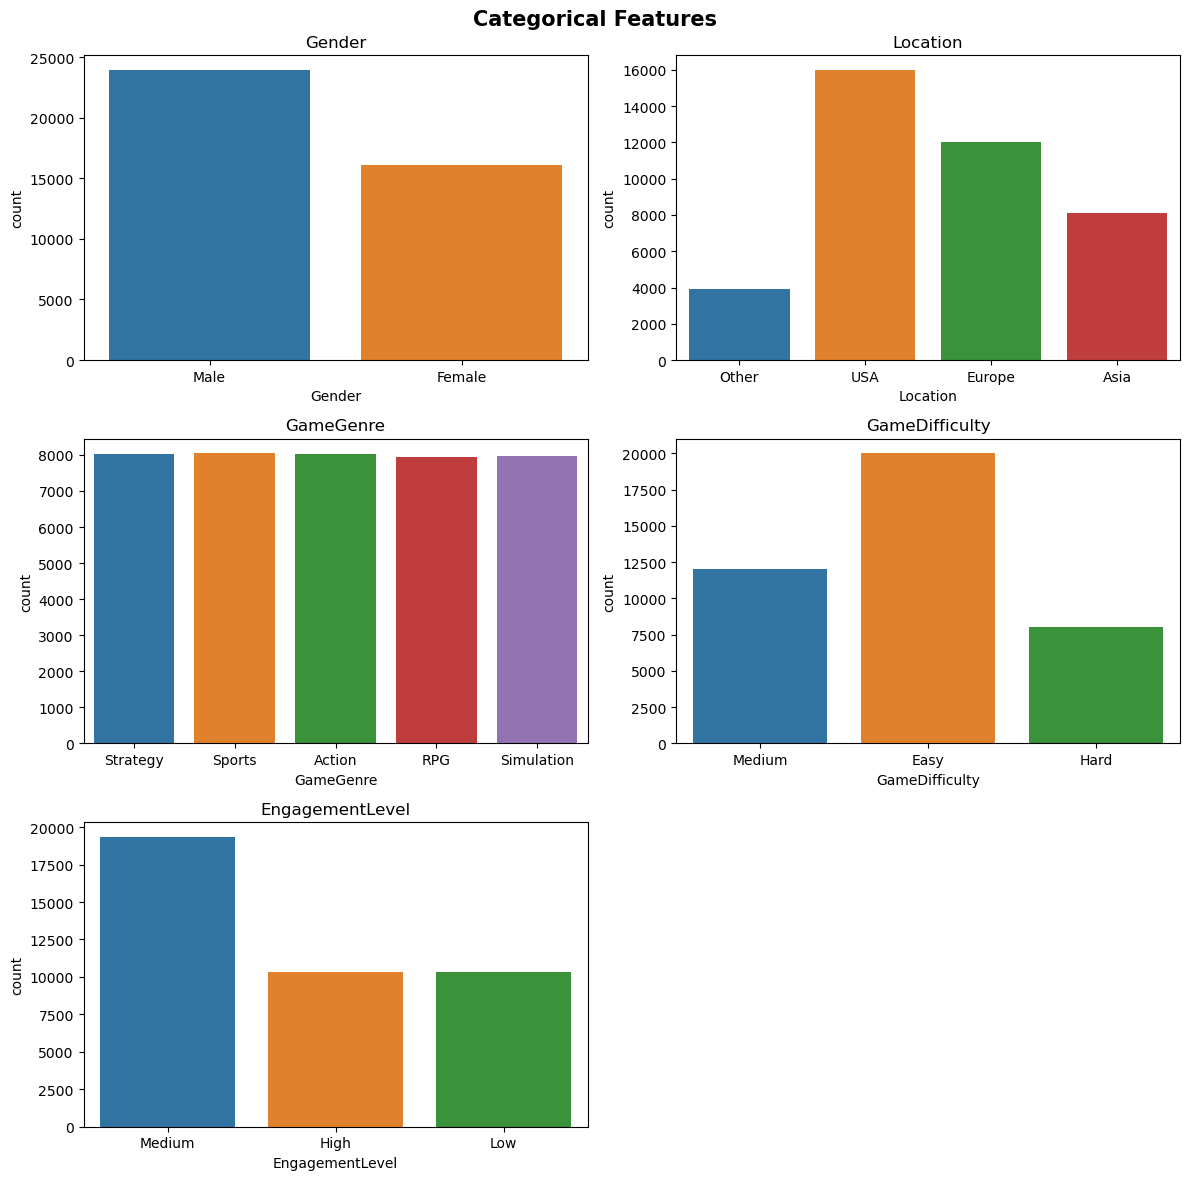

In [79]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

for i, column in enumerate(df.select_dtypes(include=["object"])):
    sns.countplot(x=df[column], ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(column)
    
for i in range(len(df.select_dtypes(include=["object"]).columns), 3 * 2):
    fig.delaxes(axes[i // 2, i % 2])
    
plt.suptitle("Categorical Features", fontsize=15, fontweight="bold")
plt.tight_layout()
plt.show()

In [80]:
# There are no outliers for both numerical and categorical features.

## Analyzing Relationships

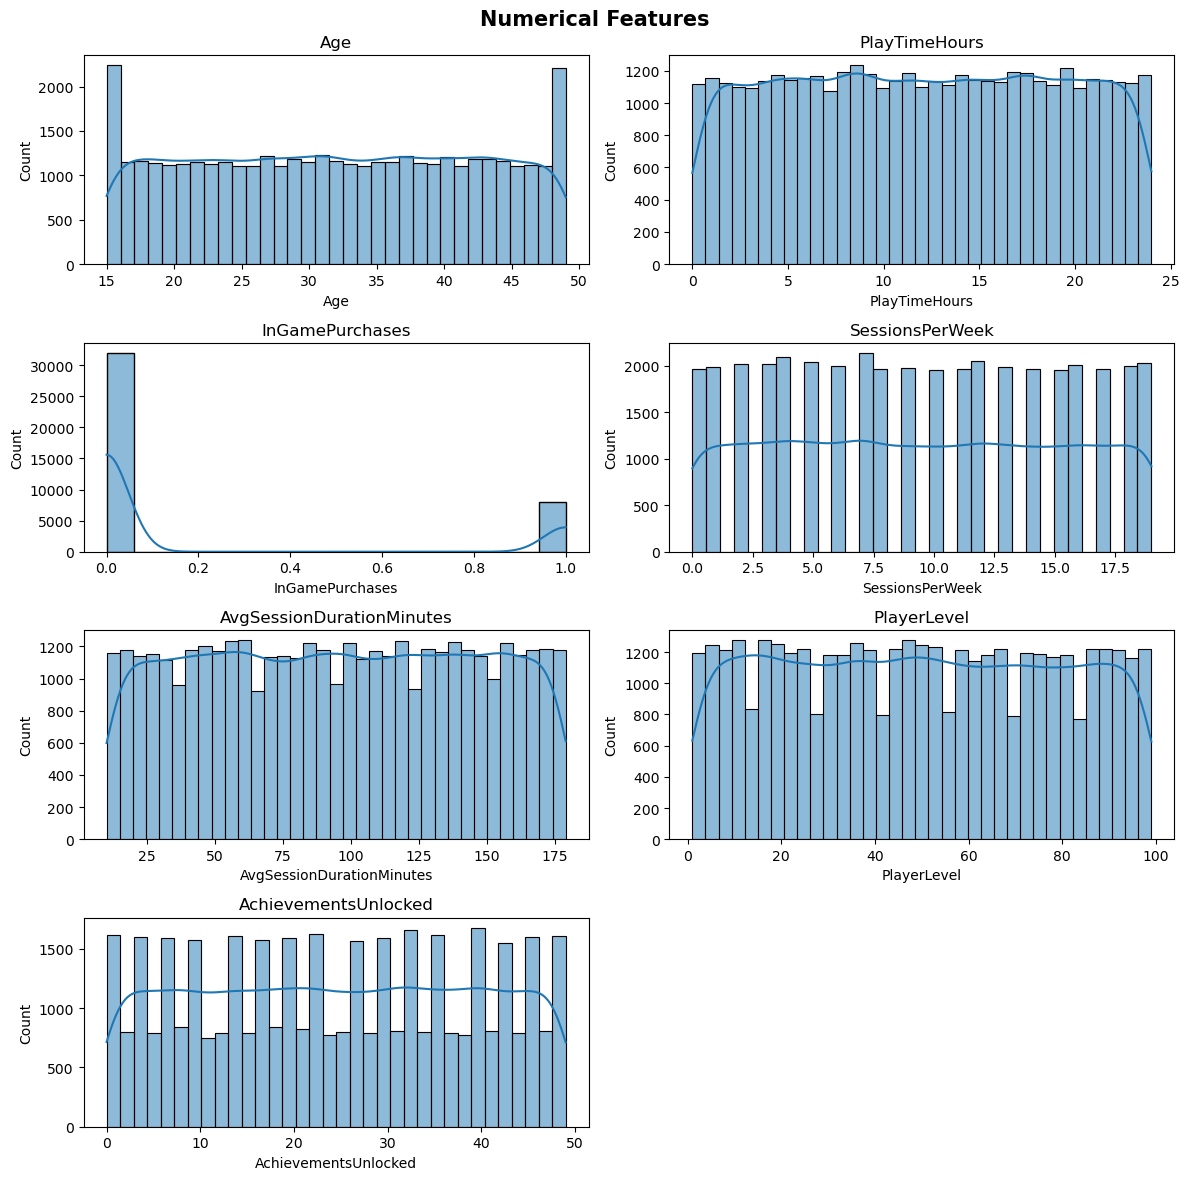

In [81]:
fig, axes = plt.subplots(4, 2, figsize=(12, 12))

for i, column in enumerate(df.select_dtypes(include=["int64", "float64"])):
    sns.histplot(x=df[column], kde=True, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(column)
    
for i in range(len(df.select_dtypes(include=["int64", "float64"]).columns), 4 * 2):
    fig.delaxes(axes[i // 2, i % 2])
    
plt.suptitle("Numerical Features", fontsize=15, fontweight="bold")
plt.tight_layout()
plt.show()

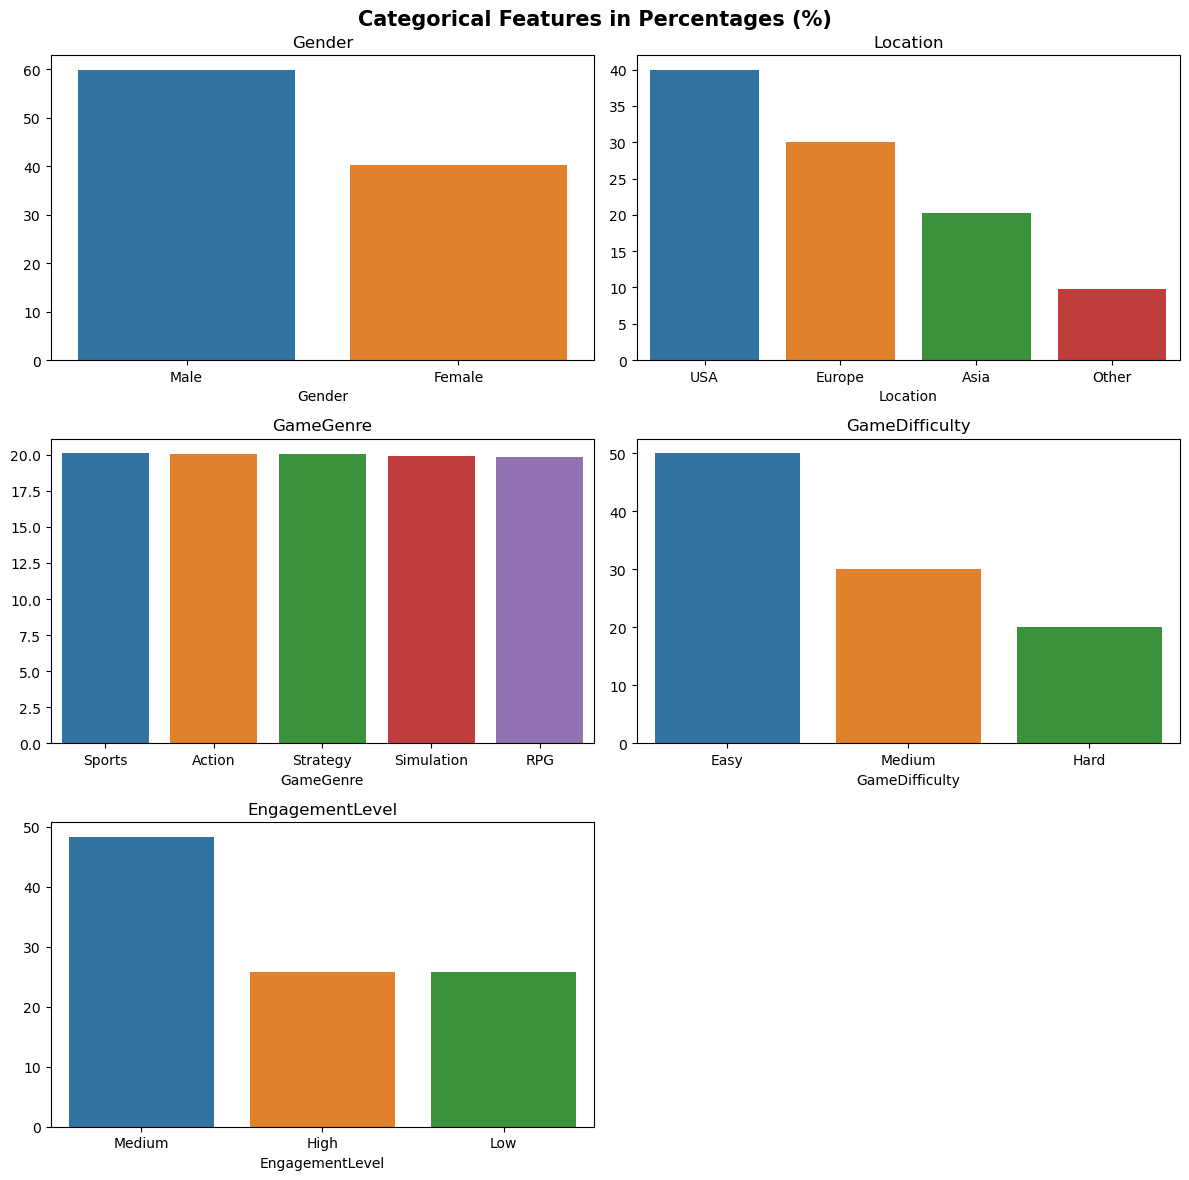

In [82]:
# In Percentages

fig, axes = plt.subplots(3, 2, figsize=(12, 12))

for i, column in enumerate(df.select_dtypes(include=["object"])):
    category_counts = df[column].value_counts(normalize=True) * 100
    
    sns.barplot(data=df, x=category_counts.index, y=category_counts.values, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(column)
    
for i in range(len(df.select_dtypes(include=["object"]).columns), 3 * 2):
    fig.delaxes(axes[i // 2, i % 2])
    
plt.suptitle("Categorical Features in Percentages (%)", fontsize=15, fontweight="bold")
plt.tight_layout()
plt.show()

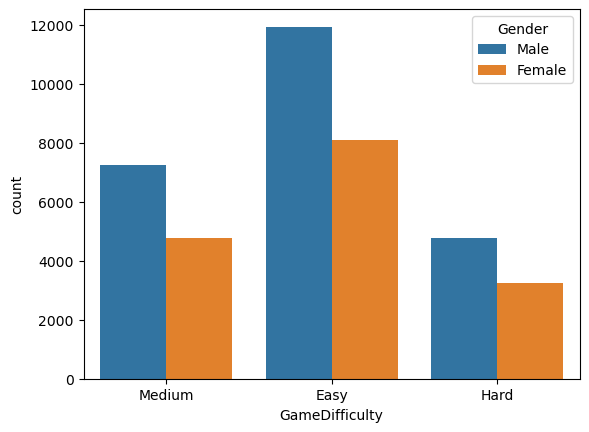

In [83]:
sns.countplot(data=df, x="GameDifficulty", hue="Gender")
plt.show()

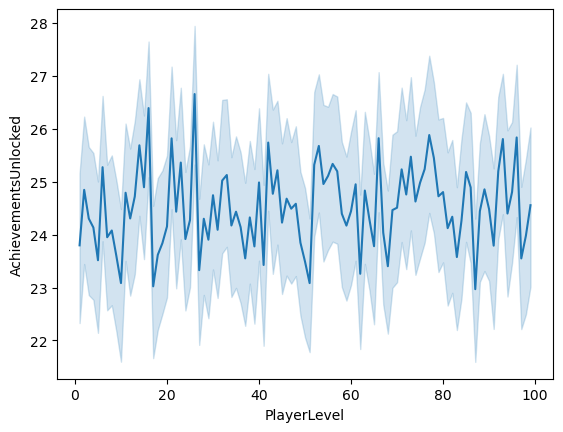

In [84]:
sns.lineplot(data=df, x="PlayerLevel", y="AchievementsUnlocked")
plt.show()

## Dummy

In [85]:
df.dtypes

Age                            int64
Gender                        object
Location                      object
GameGenre                     object
PlayTimeHours                float64
InGamePurchases                int64
GameDifficulty                object
SessionsPerWeek                int64
AvgSessionDurationMinutes      int64
PlayerLevel                    int64
AchievementsUnlocked           int64
EngagementLevel               object
dtype: object

In [86]:
df = pd.get_dummies(df, columns=["Gender", "Location", "GameGenre", "GameDifficulty"])
df = df.astype({col: "int64" for col in df.columns if df[col].dtype == "bool"})

In [87]:
df.dtypes

Age                            int64
PlayTimeHours                float64
InGamePurchases                int64
SessionsPerWeek                int64
AvgSessionDurationMinutes      int64
PlayerLevel                    int64
AchievementsUnlocked           int64
EngagementLevel               object
Gender_Female                  int64
Gender_Male                    int64
Location_Asia                  int64
Location_Europe                int64
Location_Other                 int64
Location_USA                   int64
GameGenre_Action               int64
GameGenre_RPG                  int64
GameGenre_Simulation           int64
GameGenre_Sports               int64
GameGenre_Strategy             int64
GameDifficulty_Easy            int64
GameDifficulty_Hard            int64
GameDifficulty_Medium          int64
dtype: object

In [88]:
mapping = {"Low": 1, "Medium": 2, "High": 3}
df["EngagementLevel"] = df["EngagementLevel"].map(mapping).astype("int64")

In [89]:
df.dtypes

Age                            int64
PlayTimeHours                float64
InGamePurchases                int64
SessionsPerWeek                int64
AvgSessionDurationMinutes      int64
PlayerLevel                    int64
AchievementsUnlocked           int64
EngagementLevel                int64
Gender_Female                  int64
Gender_Male                    int64
Location_Asia                  int64
Location_Europe                int64
Location_Other                 int64
Location_USA                   int64
GameGenre_Action               int64
GameGenre_RPG                  int64
GameGenre_Simulation           int64
GameGenre_Sports               int64
GameGenre_Strategy             int64
GameDifficulty_Easy            int64
GameDifficulty_Hard            int64
GameDifficulty_Medium          int64
dtype: object

In [90]:
df.head()

,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,Gender_Female,Gender_Male,...,Location_Other,Location_USA,GameGenre_Action,GameGenre_RPG,GameGenre_Simulation,GameGenre_Sports,GameGenre_Strategy,GameDifficulty_Easy,GameDifficulty_Hard,GameDifficulty_Medium
0,43,16.271119,0,6,108,79,25,2,0,1,...,1,0,0,0,0,0,1,0,0,1
1,29,5.525961,0,5,144,11,10,2,1,0,...,0,1,0,0,0,0,1,0,0,1
2,22,8.223755,0,16,142,35,41,3,1,0,...,0,1,0,0,0,1,0,1,0,0
3,35,5.265351,1,9,85,57,47,2,0,1,...,0,1,1,0,0,0,0,1,0,0
4,33,15.531945,0,2,131,95,37,2,0,1,...,0,0,1,0,0,0,0,0,0,1


In [91]:
df["EngagementLevel"].value_counts()

EngagementLevel
2    19374
3    10336
1    10324
Name: count, dtype: int64

## Modeling

In [92]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [93]:
y = df["EngagementLevel"]
X = df.drop(columns=["EngagementLevel"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Random Forests

In [94]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
rf_model = RandomForestClassifier(random_state=42)

In [96]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [97]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=10, scoring="accuracy", n_jobs=-1, verbose=2)

In [98]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=2)

In [99]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: ", best_params)
print("Best Score: ", best_score)

Best Parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score:  0.8989508714691926


In [100]:
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

y_pred_rf = best_rf_model.predict(X_test)

#### Analysis

In [101]:
accuracy_score(y_test, y_pred_rf)

0.8924967529223699

In [102]:
confusion_matrix(y_test, y_pred_rf)

array([[2214,  321,   71],
       [ 148, 4508,  124],
       [  84,  328, 2211]], dtype=int64)

In [103]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           1       0.91      0.85      0.88      2606
           2       0.87      0.94      0.91      4780
           3       0.92      0.84      0.88      2623

    accuracy                           0.89     10009
   macro avg       0.90      0.88      0.89     10009
weighted avg       0.89      0.89      0.89     10009



In [104]:
# Cross Validation

In [105]:
best_rf_scores = cross_val_score(best_rf_model, X_train, y_train, cv=10, scoring="accuracy", n_jobs=-1, verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   14.3s remaining:   14.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   14.4s finished


In [106]:
print("Random Forest Cross-Validation Accuracy: %0.2f (+/- %0.2f)" % (best_rf_scores.mean(), best_rf_scores.std()))

Random Forest Cross-Validation Accuracy: 0.90 (+/- 0.00)


In [107]:
# Overfitting Check

train_score_rf = accuracy_score(y_train, best_rf_model.predict(X_train))
test_score_rf = accuracy_score(y_test, best_rf_model.predict(X_test))

print("RF Train Score: ", train_score_rf)
print("RF Test Score: ", test_score_rf)

RF Train Score:  1.0
RF Test Score:  0.8924967529223699


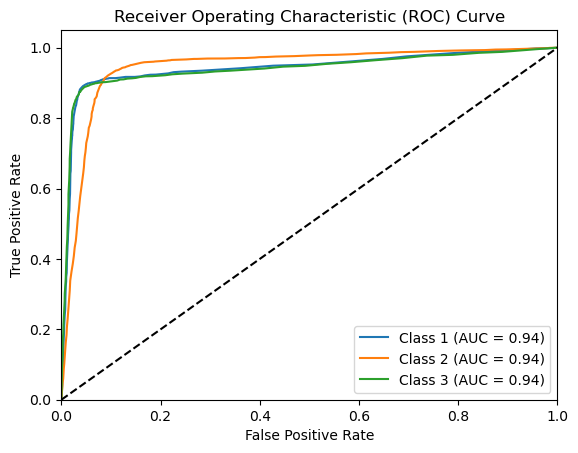

In [108]:
# ROC Curve and AUC

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = best_rf_model.predict_proba(X_test)

# Binarizing the true label for multi class classification
y_test_binarized = label_binarize(y_test, classes=[1, 2, 3])

plt.figure()

# Getting the number of classes
n_classes = y_test_binarized.shape[1]

# Looping through each class
for i in range(n_classes):
    
    # Computing False Positive Rate and True Positive Rate
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    
    # Computing the AUC
    auc = roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i])
    
    plt.plot(fpr, tpr, label=f"Class {i+1} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

The ROC curves for all three classes are close to the top left corner, indicating that the model performs well.

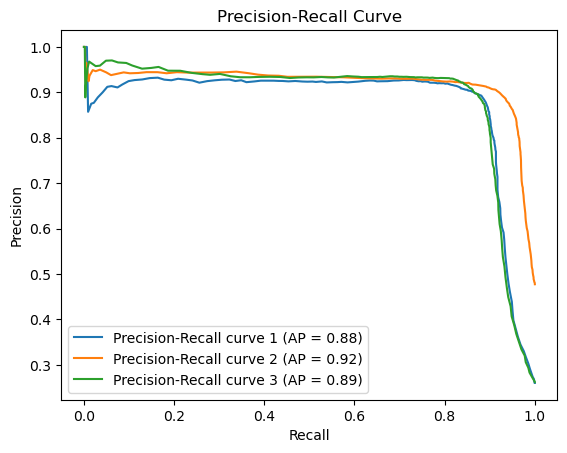

In [109]:
# Precision-Recall Curve

from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure()

# Looping through each class
for i in range(n_classes):
    
    # Compute precision and recall
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    
    # Compute the average precision
    average_precision = average_precision_score(y_test_binarized[:, i], y_pred_proba[:, i])
    
    plt.plot(recall, precision, label=f"Precision-Recall curve {i+1} (AP = {average_precision:.2f})")
    
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.show()

The Average Precision scores for the three classes are very similar, differing by just +/-0.03. Overall, the model shows consistent performance across classes.

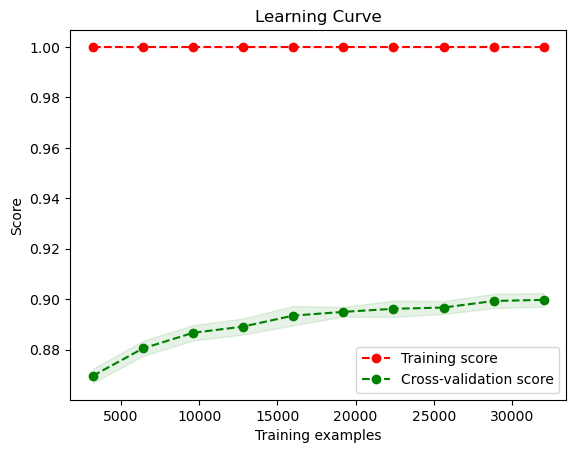

In [110]:
# Learning Curve 

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(best_rf_model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, "o--", color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, "o--", color="g", label="Cross-validation score")
plt.fill_between (train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between (train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

The results in the graph indicate that the model tends toward overfitting.
The training score remains consistently at 1, meaning the model has perfectly learned the training data.
However, the cross-validation score stays around 0.90 and is not as high as the training score.
This suggests that while the model fits the training data very well, it does not perform as well on new and unseen data.

Despite the overfitting, the model is still performing well. Since the test score is 0.90, the model is able to make strong predictions on new data as well.

In [111]:
# Error Analysis

misclassified = X_test[y_test != y_pred_rf]

error_analysis_df = pd.DataFrame(misclassified, columns=X.columns)
error_analysis_df["Actual"] = y_test[y_test != y_pred_rf]
error_analysis_df["Predicted"] = y_pred_rf[y_test != y_pred_rf]

print(error_analysis_df)

       Age  PlayTimeHours  InGamePurchases  SessionsPerWeek  \
24899   32      23.322086                0               11   
7568    18      10.850421                0               16   
37920   48      17.841127                0               19   
252     49       4.680904                0                0   
36168   41      20.839054                0               19   
...    ...            ...              ...              ...   
15895   47       9.342144                0                4   
37538   20       7.523288                0               17   
7204    20      17.390509                0               13   
9154    43      17.984249                0               14   
28407   46       4.765528                0                7   

       AvgSessionDurationMinutes  PlayerLevel  AchievementsUnlocked  \
24899                         17           12                    34   
7568                          85           84                    25   
37920                         

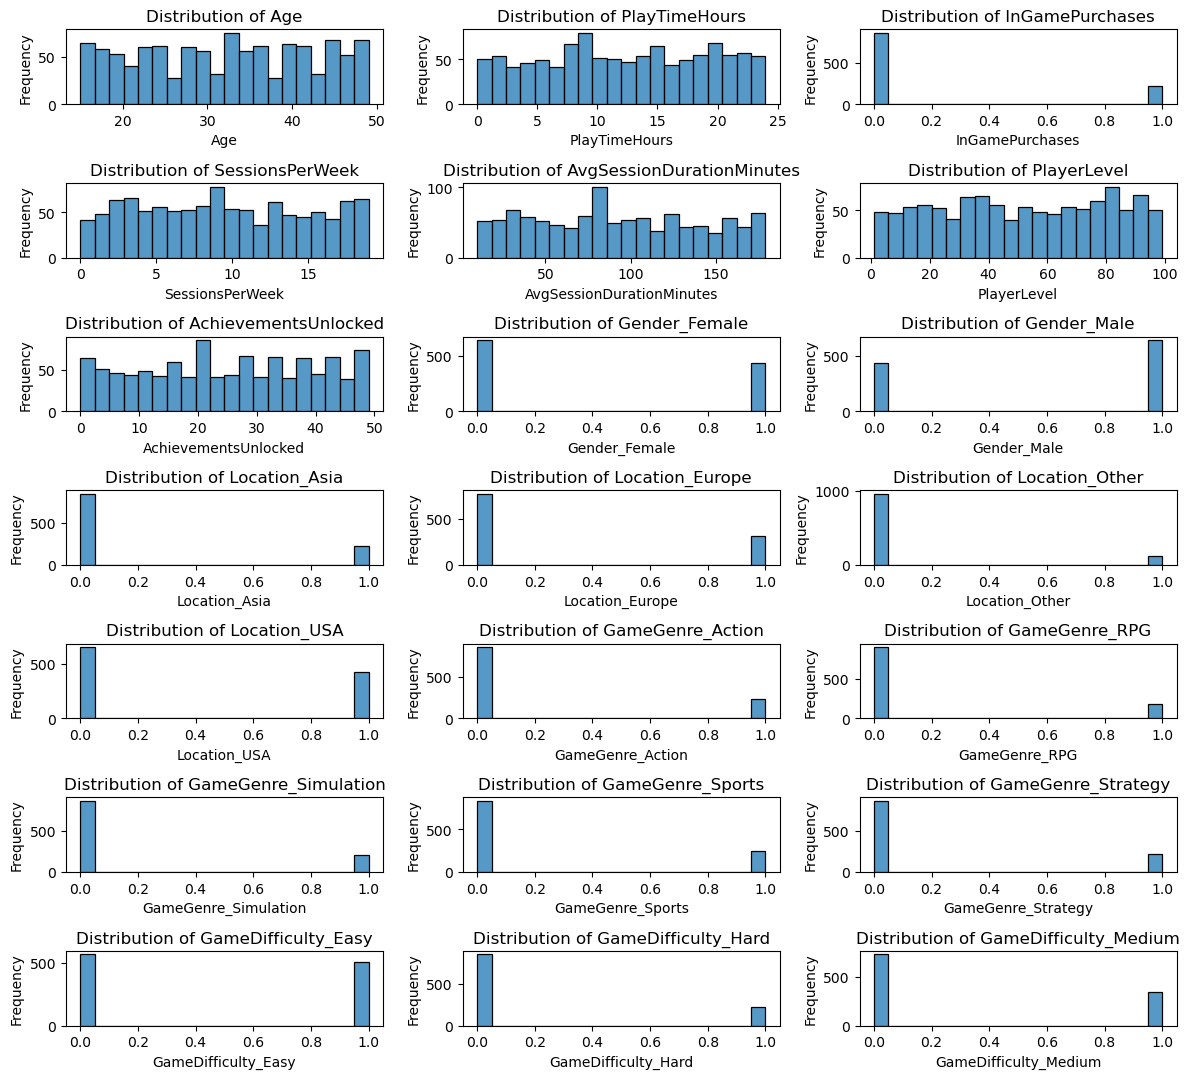

In [112]:
features = df.drop(columns=["EngagementLevel"]).columns

fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(12, 12), sharex=False, sharey=False)

for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    sns.histplot(error_analysis_df[feature], kde=False, bins=20, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')

for i in range(len(features), 24):
    row = i // 3
    col = i % 3
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

The code generates histograms to visualize the distribution of each feature in the "error_analysis_df" Dataframe, which contains misclassified observations. This helps in analyzing how features like "Age" might influence model performance and identify patterns and misclassified data.

### Support Vector Classifier (SVC)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_model = SVC()

In [ ]:
svc_model.fit(X_train, y_train)

In [ ]:
y_pred_svc = svc_model.predict(X_test)

#### Analysis

In [ ]:
accuracy_score(y_test, y_pred_svc)

In [ ]:
confusion_matrix(y_test, y_pred_svc)

In [ ]:
print(classification_report(y_test, y_pred_svc))

In [ ]:
# Cross Validation

In [ ]:
best_svc_scores = cross_val_score(svc_model, X_train, y_train, cv=10, scoring="accuracy", n_jobs=-1, verbose=2)

In [ ]:
print("Support Vector Machine Cross-Validation Accuracy: %0.2f (+/- %0.2f)" % (best_svc_scores.mean(), best_svc_scores.std()))

In [ ]:
# Overfitting Check

train_score_svc = accuracy_score(y_train, svc_model.predict(X_train))
test_score_svc = accuracy_score(y_test, svc_model.predict(X_test))

print("SVC Train Score: ", train_score_svc)
print("SVC Test Score: ", test_score_svc)

### XGBoost

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [ ]:
import xgboost as xgb

In [ ]:
xgb_model = xgb.XGBClassifier()

In [ ]:
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 6],
    "learning_rate": [0.01, 0.1],
    "gamma": [0, 0.1]
}

In [ ]:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           cv=10, scoring="accuracy", n_jobs=-1, verbose=2)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Score: {best_score:.2f}')

In [ ]:
best_xgb_model = xgb.XGBClassifier(**best_params, random_state=42)
best_xgb_model.fit(X_train, y_train)

y_pred_xgb = best_xgb_model.predict(X_test)

#### Analysis

In [ ]:
accuracy_score(y_test, y_pred_xgb)

In [ ]:
confusion_matrix(y_test, y_pred_xgb)

In [ ]:
print(classification_report(y_test, y_pred_xgb))

In [ ]:
# Cross Validation

In [ ]:
best_xgb_scores = cross_val_score(xgb_model, X_train, y_train, cv=10, scoring="accuracy", n_jobs=-1, verbose=2)

In [ ]:
print("XGBoost Cross-Validation Accuracy: %0.2f (+/- %0.2f)" % (best_xgb_scores.mean(), best_xgb_scores.std()))

In [ ]:
# Overfitting Check

train_score_xgb = accuracy_score(y_train, best_xgb_model.predict(X_train))
test_score_xgb = accuracy_score(y_test, best_xgb_model.predict(X_test))

print("XGB Train Score: ", train_score_xgb)
print("XGB Test Score: ", test_score_xgb)